# CASO FINAL - MODULO 3: LA CIENCIA DE DATOS

### 1. Cargar los datos y realizar un análisis exploratorio y una evaluación de la calidad de los datos necesarios para el resto del caso.

#### Específicamente, evaluar la integridad, validez y actualidad de los datos y proponer estrategias de mitigación de los posibles problemas encontrados.

In [1]:
import pandas as pd
import numpy as np

In [2]:
DF = pd.read_csv('/Users/viole/Downloads/compas-scores.csv') 

Creamos un dataset reducido con los campos que se indican en el enunciado. También incluimos las columnas de nombre, edad, sexo y raza para identificar a los distintos individuos y ver si estas caracteristicas tienen alguna influencia en los resultados.

Es interesante incluir la columna que cuenta las veces que cada individuo ha estado arrestado previas al estudio (priors_count), ya que puede aportar mucha informacion acerca de la posibilidad de reincidencia.

In [3]:
df= DF[['name', 'age', 'sex', 'race', 'compas_screening_date', 'decile_score', 'v_decile_score', 'is_recid', 'r_offense_date', 'is_violent_recid', 'vr_offense_date', 'priors_count' 
 ]].copy()

In [4]:
df.head()

,name,age,sex,race,compas_screening_date,decile_score,v_decile_score,is_recid,r_offense_date,is_violent_recid,vr_offense_date,priors_count
0,miguel hernandez,69,Male,Other,2013-08-14,1,1,0,NaN,0,NaN,0
1,michael ryan,31,Male,Caucasian,2014-12-31,5,2,-1,NaN,0,NaN,0
2,kevon dixon,34,Male,African-American,2013-01-27,3,1,1,2013-07-05,1,2013-07-05,0
3,ed philo,24,Male,African-American,2013-04-14,4,3,1,2013-06-16,0,NaN,4
4,marcu brown,23,Male,African-American,2013-01-13,8,6,0,NaN,0,NaN,1


### ANALISIS

Hacemos un primer analisis superficial de los datos a través de las 5 primeras filas.

Como podemos ver la columna de r_offense_date y vr_offense_date contienen valores nulos que habrá que subsanar.



In [5]:
print(df.isnull().sum())

name                         0
age                          0
sex                          0
race                         0
compas_screening_date        0
decile_score                 0
v_decile_score               0
is_recid                     0
r_offense_date            8054
is_violent_recid             0
vr_offense_date          10875
priors_count                 0
dtype: int64


Como hemos dicho antes y tras esta comprobación, solo tenemos dos columnas con valores nulos. En este caso, al tratarse de fechas, la mejor opción es eliminar los valores nulos. No es posible hacer una sustitución ya que la veracidad de los datos se vería afectada.

In [6]:
df_noNa=df.dropna().copy()

In [7]:
print(df_noNa.isnull().sum())

name                     0
age                      0
sex                      0
race                     0
compas_screening_date    0
decile_score             0
v_decile_score           0
is_recid                 0
r_offense_date           0
is_violent_recid         0
vr_offense_date          0
priors_count             0
dtype: int64


In [8]:
df.shape

(11757, 12)

In [9]:
df_noNa.shape

(882, 12)

Con la eliminacion de los valores nulos, el dataset se reduce considerablemente, lo que nos indica que la calidad del mismo no es muy buena, ya que estamos perdiendo cerca de un 90% de los datos (de 11.757 casos a tan solo 882), lo que reduce significativamente la integridad.

Por otro lado, sabemos que la columna is_recid puede tener los siguientes valores:
- -1 (tras analizar las diferentes columnas vemos que hay una falta de datos de los arrestos)
- 0 (no ha reincidido) 
- 1 (ha reincidido)

Procedemos a eliminar los casos en los que el valor de esa columna es -1 ya que son incompletos.

In [10]:
df_clean = df_noNa[df_noNa['is_recid']!= -1].copy()

In [11]:
df_clean['is_recid'].unique()

array([1], dtype=int64)

Vamos a continuar viendo si existen duplicidades en los datos registrados

In [12]:
df_clean.nunique()

name                     881
age                       51
sex                        2
race                       6
compas_screening_date    468
decile_score              10
v_decile_score            10
is_recid                   1
r_offense_date           605
is_violent_recid           1
vr_offense_date          599
priors_count              31
dtype: int64

Tenemos 881 nombres para 882 casos, por lo que vamos a estudiar si se trata de una duplicidad o no.

In [13]:
df_clean[df_clean.duplicated(['name'], keep=False)]

,name,age,sex,race,compas_screening_date,decile_score,v_decile_score,is_recid,r_offense_date,is_violent_recid,vr_offense_date,priors_count
2230,james scott,24,Male,African-American,2013-01-31,9,9,1,2013-02-07,1,2014-02-09,12
8772,james scott,40,Male,African-American,2013-09-12,6,8,1,2013-10-12,1,2013-10-12,23


Como vemos se trata de dos personas distintas, comparten el mismo nombre pero la edad es diferente. 

A continuación, veamos la información acerca del tipo de datos.

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 2 to 11737
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   882 non-null    object
 1   age                    882 non-null    int64 
 2   sex                    882 non-null    object
 3   race                   882 non-null    object
 4   compas_screening_date  882 non-null    object
 5   decile_score           882 non-null    int64 
 6   v_decile_score         882 non-null    int64 
 7   is_recid               882 non-null    int64 
 8   r_offense_date         882 non-null    object
 9   is_violent_recid       882 non-null    int64 
 10  vr_offense_date        882 non-null    object
 11  priors_count           882 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 89.6+ KB


Python conseidera muchas de las columnas objetos, lo que es muy general. Vamos a reclasificarlas de la siguiente manera:
- La columna nombre la covertiremos en una cadena de texto
- El sexo y la raza, en categorías
- Las 3 columnas que nos indican fechas, en fechas

In [15]:
df_clean['name'] = df_clean['name'].astype('string')

df_clean['sex'] = df_clean['sex'].astype('category')
df_clean['race'] = df_clean['race'].astype('category')

df_clean['compas_screening_date'] = pd.to_datetime(df_clean['compas_screening_date'])
df_clean['r_offense_date'] = pd.to_datetime(df_clean['r_offense_date'])
df_clean['vr_offense_date'] = pd.to_datetime(df_clean['vr_offense_date'])


In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 2 to 11737
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   882 non-null    string        
 1   age                    882 non-null    int64         
 2   sex                    882 non-null    category      
 3   race                   882 non-null    category      
 4   compas_screening_date  882 non-null    datetime64[ns]
 5   decile_score           882 non-null    int64         
 6   v_decile_score         882 non-null    int64         
 7   is_recid               882 non-null    int64         
 8   r_offense_date         882 non-null    datetime64[ns]
 9   is_violent_recid       882 non-null    int64         
 10  vr_offense_date        882 non-null    datetime64[ns]
 11  priors_count           882 non-null    int64         
dtypes: category(2), datetime64[ns](3), int64(6), string(1)
memory 

Una vez limpios los datos, vamos a hacer una valoración del dataset. Para ello nos vamos a basar en 3 de las 6 dimensiones estudiadas. 

Empezando por la __integridad__, podemos decir que se ve muy reducida debido a que no disponemos de todos los datos relevantes para analizar la precisión del sistema al tener que eliminar una gran cantidad de casos por la falta de valores. 

Por el contrario tenemos una alta __validez__ ya que los datos siguen las mismas reglas y usan la misma sistaxis. Analizando los datos por columnas podemos ver que los valores de edad se mueven desde los 18 hasta los 77; por otro lado, ambas puntuaciones, lo hacen en el rango 1-10 descrito en el enunciado; el numero de arrestos previos fluctua entre 0 y 38, lo cual tiene sentido legal, así como el rango de edad. Para las columnas de reincidencia violenta y no violenta podemos ver que solo contienen un valor, 1. Al limpiar los valores nulos del dataframe hemos eliminado todos los casos de no reincidencia dejando solo los que si han vuelto a cometer un crimen, cerciorando la falta de intergidad de este dataset. 

Por último, podemos comentar que respecto a  la __actualidad__, estando en el año 2022 este dataset no es muy reciente al haber pasado casi 10 años desde la realización del estudio.

### ESTRATÉGIAS

Las estrategias posibles para mitigar la falta de calidad son:
- Perfilado de datos: analizamos los datos tratando de detectar problemas.
- La limpieza de datos: realizada al eliminar los valores nulos encontrado en el perfilado, viendo si hay duplicidades y tipando los datos.
- Enriquecimiento de datos: estrategia a futuro para tratar de complementar la información disponible para poder realizar un mejor analisis de los mismos.

Para evitar sacrificar alguna dimensión al tratar de mejorar la integridad la mejor opción sería una nueva recoleccion de datos. Esto también podría ayudar a mejorar la actualidad si los nuevos datos son tomados de los registros de los ultimos años.

### 2. ¿Son los campos “is_recid” e “is_violent_recid” en este conjunto de datos adecuados para evaluar la precisión de las estimaciones de riesgo generadas por el sistema COMPAS? Si no es así, definir y calcular una feature que sí lo sea.

Para poder ver si son adecuados tenemos que trabajar con el dataset original ya que, en el que hemos limpiado solo hay un valor posible para ambas columnas (“is_recid” e “is_violent_recid”). 

Realizamos una tabla de contigencia para evaluarlo, calculando la precisión a través de los resultados obtenidos. Tomaremos los valores de si es reincidente como reales y las predicciones del programa (decile_score) mayores a 7 * como los datos predichos.


*Tomamos los valores mayores que 7 ya que se indica en el siguiente apartado que es el umbral desde el cual se toman medidas preventivas.

In [17]:
tabla_contingencia = pd.crosstab(df['is_recid']==1,df['decile_score'] >=7, rownames=['Predichos'],colnames=['Reales'])

In [18]:
tabla_contingencia


Reales,False,True
Predichos,,
False,6449,1605
True,2200,1503


In [19]:
precision = 1503/(2200+1503)
round(precision*100,2)

40.59

La precisión del sistema COMPAS para los sujetos que son reincidentes no violentos es de un 40%. Es decir, más de la mitad de los casos son considerados como posibles reincidentes cuando en verdad no lo son. Por lo que, la variable is_recid no es aducuada para realizar las estimaciones.

Vamos a realizar el mismo analisis para los casos violentos.


In [20]:
tabla_contingencia2 = pd.crosstab(df['is_violent_recid']==1,df['v_decile_score'] >=7, rownames=['Predichos'],colnames=['Reales'])
tabla_contingencia2


Reales,False,True
Predichos,,
False,9359,1516
True,616,266


In [21]:
precision2 = 266/(616+266)
round(precision2*100,2)

30.16

En este caso, la precisión del sistema es menor que para los no violentos, siendo esta de un escaso 30%. Es decir, 2 de cada 3 individuos son clasificados incorrectamente.

Para cerciorarnos de si estas variables son las más adecuadas para explicar las estimaciones, vamos a elavorar una matriz de correlación entre variables y ver cuales son las mejores. Esto también nos ayudará a escoger la feature para desarrollar un mejor sistema de predicción.

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


<AxesSubplot:>

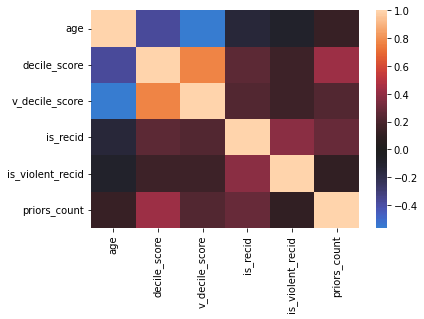

In [23]:
sns.heatmap(df.corr(),center=0)


Según la anterior matriz de correlación, el campo _is_recid_ tiene una relación positiva de 0.4 respecto a _decile_score_. Mientras que para los casos violentos vemos que la relación es también positiva pero menor, siendo esta de aproximadamente 0.2.

Ambas variables tienen una relación positiva pero, como podemos observar en la matriz, la variable que más relación tiene con _decile_score_ es _priors_count_, con un coeficiente de corrrelación del 0.5. Para el caso de los reincidentes violentos vemos que la variable _priors_count_ también está más relacionada con _v_decile_score_.

Por lo que, vamos a desarrollar un modelo de regresión simple en el cual la variable dependiente será la estimación del riesgo del sistema COMPAS y la independiente, la veces que ha sido arrestado cada sujeto.

In [24]:
from sklearn import linear_model

In [25]:
X = df.priors_count

In [26]:
y = df.decile_score

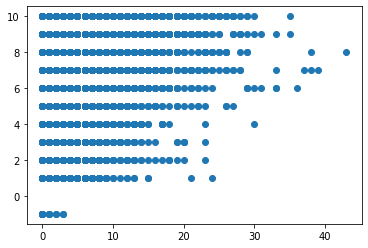

In [27]:
plt.scatter(X,y)

Como vemos a simple vista en el gráfico, el error del modelo va a ser muy alto. Vamos a entrenarlo cogiendo una muestra de un 10% de los datos del dataset y ver qué sucede.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.1 )

In [30]:
X_train = np.array(X_train) 
X_train = X_train.reshape(-1, 1)

X_test = np.array(X_test) 
X_test = X_test.reshape(-1, 1)


In [31]:
regresion= linear_model.LinearRegression(fit_intercept = True,  normalize=True)

In [32]:
regresion.fit(X_train, y_train)

LinearRegression(normalize=True)

In [33]:
y_pred = regresion.predict(X_test)


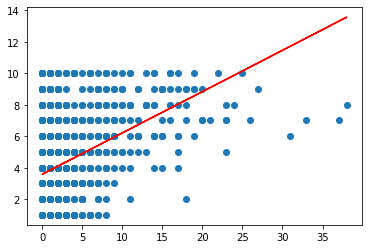

In [34]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='r')

La ecuación del modelo es:


In [35]:
print('y= ', regresion.coef_, '+ x', regresion.intercept_)

y=  [0.2624745] + x 3.5809622561506216


La precisión del modelo o R2 es la siguiente:

In [36]:
print(regresion.score(X_train, y_train))

0.1822132216747545


Como vemos no es la mejor variable para explicar el modelo ya que el valor del coeficiente de determinación es más proximo a 0 que a 1. Pero la precisión es 3 veces mayor que con la variable is_recid (afirmación hecha tras realizar el cambio en  la variable y obtener un valor de 0.06 del coeficiente).

### 3. El umbral para establecer medidas preventivas de la reincidencia es de 7 en adelante.

#### Dado este umbral, generar una tabla de contingencia, explicando qué caso se considera como “positivo” (y, por lo tanto, cuáles son los errores de tipo I y los errores de tipo II).

Vamos a ver primero el caso de los no violentos

In [37]:
tabla_contingencia

Reales,False,True
Predichos,,
False,6449,1605
True,2200,1503


In [38]:
Positivos = 6449+1503
Tot = 6449+1605+2200+1503
porcent= round(Positivos/Tot*100,2)

fP = 2200/Tot
fN = 1605/Tot

print('Total calificados correctamente: ',Positivos)
print('Total: ', Tot)
      
print('Pocentaje de calificados correctamente: ', porcent)
print('Falsos positivos o ERROR tipo I',fP)
print('Falsos negativos o ERROR tipo II',fN)

Total calificados correctamente:  7952
Total:  11757
Pocentaje de calificados correctamente:  67.64
Falsos positivos o ERROR tipo I 0.18712256528025856
Falsos negativos o ERROR tipo II 0.13651441694309774


Los casos positivos, es decir, aquellos que el programa ha clasificado correctamente son 7952 de un total de 11757 (67% de casos acertados). Por lo tanto tenemos un tercio de los casos considerados como error. Existen dos tipos de errores: los falsos positivos, siendo estos un 18% del total, y los falsos negativos, un 13% sobre el total de observaciones. 

Ahora veamos que sucede para los casos violentos

In [39]:
tabla_contingencia2

Reales,False,True
Predichos,,
False,9359,1516
True,616,266


In [40]:
Positivos2 = 9359+266
Tot2 = 9359+266+616+1516
porcent2= round(Positivos2/Tot2*100,2)

fP2 = 616/Tot2
fN2 = 1516/Tot2

print('Total calificados correctamente: ',Positivos2)
print('Total: ', Tot2)
      
print('Pocentaje de calificados correctamente: ', porcent2)
print('Falsos positivos o ERROR tipo I',fP2)
print('Falsos negativos o ERROR tipo II',fN2)

Total calificados correctamente:  9625
Total:  11757
Pocentaje de calificados correctamente:  81.87
Falsos positivos o ERROR tipo I 0.0523943182784724
Falsos negativos o ERROR tipo II 0.12894445862039636


Por parte de los casos violentos, el  porcentaje de acierto es mayor, superando este el 80%. Respecto a los errores cometidos por el programa tenemos un escaso 5% de falsos positivos y un 13% de falsos positivos. El modelo tiene una mayor capacidad de predicción para los casos violentos que para los no violentos. Aun asi, los errores cometidos en ambos casos son demasiado elevados para afirmar que el programa tiene una buen capacidad de previsión.

### 4. El sistema asigna, de media, evaluaciones de riesgo más altas a los hombres que a las mujeres, y a las personas de raza afroamericana que a las de raza caucásica. Sin embargo, también las tasas de reincidencia son más altas para esos colectivos, aunque no está claro que la asignación de riesgo sea “justa” o no.

#### Mostrar estas diferencias mediante representaciones gráficas y utilizarlas para analizar si la asignación de evaluaciones es justa o no.    

Como vamos a utilizar el dataset con todos lo datos (df), vamos a eliminar los datos para los que la reincidencia toma valor -1 ya que hay una falta de información sobre los mismos.

In [41]:
df2 = df[df.is_recid!=-1].copy()


Una vez limpio vamos a proceder a representar la frecuencia acumulada de la tasa de reincidencia frente a la evaluacion media del riesgo.


Vamos a crear un nuevo dataframe con las columnas que necesitamos. Estas son las siguientes:
- La raza del sujeto
- La evaluacion media de las columnas v_decile_score y decile_score
- Un booleano que nos diga si el individuo es reincidente o no, adjudicando True para aquellos casosen los que is_violent_recid o is_recid tenga valor 1.

Para ello vamos a crear las columnas que requieren calculos y después eliminar aquellas que no necesitamos.

In [42]:
df3 = df2.copy()

In [43]:
df3['score'] = (df3.v_decile_score + df3.decile_score)/2

In [44]:
df3["recidivist"] = df3.iloc[:,[7,9]].eq(1).any(axis=1) 

In [45]:
df3.head()

,name,age,sex,race,compas_screening_date,decile_score,v_decile_score,is_recid,r_offense_date,is_violent_recid,vr_offense_date,priors_count,score,recidivist
0,miguel hernandez,69,Male,Other,2013-08-14,1,1,0,NaN,0,NaN,0,1.0,False
2,kevon dixon,34,Male,African-American,2013-01-27,3,1,1,2013-07-05,1,2013-07-05,0,2.0,True
3,ed philo,24,Male,African-American,2013-04-14,4,3,1,2013-06-16,0,NaN,4,3.5,True
4,marcu brown,23,Male,African-American,2013-01-13,8,6,0,NaN,0,NaN,1,7.0,False
5,bouthy pierrelouis,43,Male,Other,2013-03-26,1,1,0,NaN,0,NaN,2,1.0,False


In [46]:
columns = df3.iloc[:,[0,1,2,4,5,6,7,8,9,10,11]]
df_race=df3.drop(columns,axis=1).copy()

In [47]:
df_race

,race,score,recidivist
0,Other,1.0,False
2,African-American,2.0,True
3,African-American,3.5,True
4,African-American,7.0,False
5,Other,1.0,False
...,...,...,...
11752,Other,2.0,False
11753,Caucasian,6.0,True
11754,Other,3.5,False
11755,Caucasian,2.5,False


In [48]:
df_race.race.unique()

array(['Other', 'African-American', 'Caucasian', 'Hispanic', 'Asian',
       'Native American'], dtype=object)

In [49]:
df_race.score.unique()

array([ 1. ,  2. ,  3.5,  7. ,  4. ,  9.5,  5. ,  3. ,  2.5,  4.5,  9. ,
        1.5,  8. ,  5.5,  7.5,  6.5,  6. , 10. ,  8.5, -1. ,  0. ])

Como podemos ver obtenemos puntuaciones medias inferiores a 1. Siendo la mínima puntuación 1, este es el menor valor posible, por lo que procedemos a eliminar los valores inferiores a 1 del dataset   

In [50]:
df_race_1=df_race[df_race.score>=1].copy()

In [51]:
a=len(df_race_1.race.unique())
a

6

In [52]:
# Dividir DF en true or false

m = df_race_1.recidivist==True

df_race_false = df_race_1[~m]
df_race_true = df_race_1[m]

df_race_false 


,race,score,recidivist
0,Other,1.0,False
4,African-American,7.0,False
5,Other,1.0,False
6,Other,1.0,False
8,Other,3.5,False
...,...,...,...
11750,Hispanic,1.0,False
11752,Other,2.0,False
11754,Other,3.5,False
11755,Caucasian,2.5,False


In [53]:
df_race_true

,race,score,recidivist
2,African-American,2.0,True
3,African-American,3.5,True
7,Caucasian,4.0,True
12,Caucasian,4.0,True
14,African-American,5.0,True
...,...,...,...
11738,Caucasian,4.0,True
11743,Caucasian,1.5,True
11746,African-American,4.5,True
11751,African-American,1.0,True


In [54]:
#Agrupamos por la media del score ambos datasets

b=df_race_false.groupby(['race']).mean()['score']
b

race
African-American    4.311673
Asian               1.952381
Caucasian           2.901468
Hispanic            2.813503
Native American     3.086957
Other               2.389485
Name: score, dtype: float64

In [55]:
c=df_race_true.groupby(['race']).mean()['score']
c

race
African-American    5.631034
Asian               4.636364
Caucasian           4.153352
Hispanic            4.070881
Native American     6.538462
Other               3.827922
Name: score, dtype: float64

In [56]:
# Calculamos la frecunecia acumulada de casos que son reincidentes

s=df_race_false.groupby(['race']).count()['recidivist']
s

race
African-American    3324
Asian                 42
Caucasian           2725
Hispanic             748
Native American       23
Other                466
Name: recidivist, dtype: int64

In [57]:
t=df_race_true.groupby(['race']).count()['recidivist']
t

race
African-American    2175
Asian                 11
Caucasian           1089
Hispanic             261
Native American       13
Other                154
Name: recidivist, dtype: int64

In [58]:
x=np.arange(6)

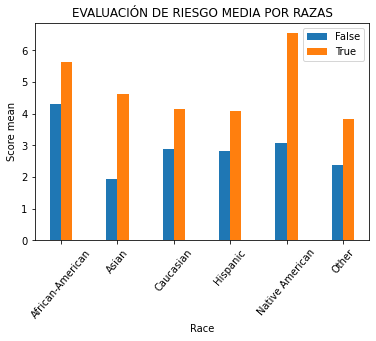

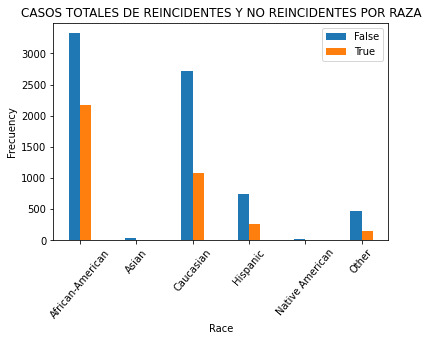

In [59]:

plt.bar(x-0.1, b, width=0.2, label='False')
plt.bar(x+0.1 ,c ,width=0.2, label='True')

plt.xticks(x,['African-American', 'Asian','Caucasian', 'Hispanic', 'Native American','Other'],rotation = 50)

plt.title('EVALUACIÓN DE RIESGO MEDIA POR RAZAS')
plt.ylabel('Score mean')
plt.xlabel('Race')

plt.legend(loc='best')

plt.show()


plt.bar(x-0.1, s, width=0.2, label='False')
plt.bar(x+0.1 ,t ,width=0.2, label='True')

plt.xticks(x,['African-American', 'Asian','Caucasian', 'Hispanic', 'Native American','Other'],rotation = 50)

plt.title('CASOS TOTALES DE REINCIDENTES Y NO REINCIDENTES POR RAZA')
plt.ylabel('Frecuency')
plt.xlabel('Race')

plt.legend(loc='best')

plt.show()



En el enunciado se afirma que la evalución de riesgo que da el sistema es mayor para personas de raza afroamericanas que caucásicas y, a mayores, la tasa de reincidencia es mayor para los afroamericanos que los caucásicos . Analicemos esta afirmación con los dos gráficos anteriores. 

En primer lugar, la evaluación media, tanto para los casos que son verdaderamente reincidentes (true/naranja) como para los que no lo son (false/azul), es considerablemente mayor para el grupo de afroamericanos, 5.6 y 4.31, respectivamente, que para los caucásicos, 4.15 y 2.9. La diferencia es de en torno a 1.5 puntos. Por lo que la primera parte de la afirmación es correcta, los afroamericanos tienen de media mayores puntuaciones que los caucasicos.

A continuación, analicemos los casos que son efectivamente reincidentes en cada grupo. Para los afroamericanos tenemos que el 60% * de los casos no son reincidentes frente a un 70% ** de los caucasicos. Por lo que, la tasa de reincidencia es un 10% mayor para los afroamericanos que para los caucasicos. En definitiva, la afirmación realizada es verdadera.

En conclusión, poniendo ambos datos en porcentaje, obtenemos que los africamericanos obtienen un 15% más de asignación de riesgo por el sistema, pero a su vez, la reincidencia en delitos es un 10% superior que el otro grupo. Por lo que, podemos decir que el 5% que difiere se puede deber a un error y no a una injusta calificación por parte del sistema COMPAS.

*Calculo realizado: 3324 * 100 / 5499 

**Calculo realizado: 2725 * 100 / 3814 

Vamos a ver ahora dependiendo del sexo del sujeto.

In [60]:
columns1 = df3.iloc[:,[0,1,3,4,5,6,7,8,9,10,11]]
df_sex=df3.drop(columns1,axis=1).copy()

In [61]:
df_sex.head()

,sex,score,recidivist
0,Male,1.0,False
2,Male,2.0,True
3,Male,3.5,True
4,Male,7.0,False
5,Male,1.0,False


In [62]:
# Dividir DF en true or false

m = df_sex.recidivist==True

df_sex_false = df_sex[~m]
df_sex_true = df_sex[m]

df_sex_false 


,sex,score,recidivist
0,Male,1.0,False
4,Male,7.0,False
5,Male,1.0,False
6,Male,1.0,False
8,Male,3.5,False
...,...,...,...
11750,Male,1.0,False
11752,Male,2.0,False
11754,Male,3.5,False
11755,Male,2.5,False


In [63]:
df_sex_true

,sex,score,recidivist
2,Male,2.0,True
3,Male,3.5,True
7,Male,4.0,True
12,Male,4.0,True
14,Male,5.0,True
...,...,...,...
11738,Female,4.0,True
11743,Male,1.5,True
11746,Male,4.5,True
11751,Male,1.0,True


In [64]:
#Agrupamos por la media del score ambos dataframes

B=df_sex_false.groupby(['sex']).mean()['score']
B

sex
Female    3.236686
Male      3.566962
Name: score, dtype: float64

In [65]:
C=df_sex_true.groupby(['sex']).mean()['score']
C

sex
Female    4.493056
Male      5.107291
Name: score, dtype: float64

In [66]:
# Calculamos la frecunecia acumulada de casos que son reincidentes

h=df_sex_false.groupby(['sex']).count()['recidivist']
h

sex
Female    1690
Male      5645
Name: recidivist, dtype: int64

In [67]:
g=df_sex_true.groupby(['sex']).count()['recidivist']
g

sex
Female     576
Male      3127
Name: recidivist, dtype: int64

In [68]:
X=np.arange(2)

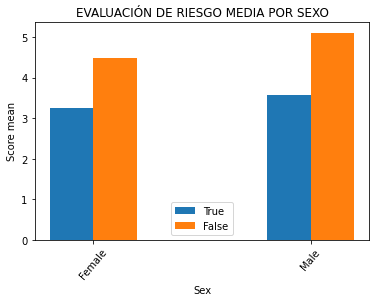

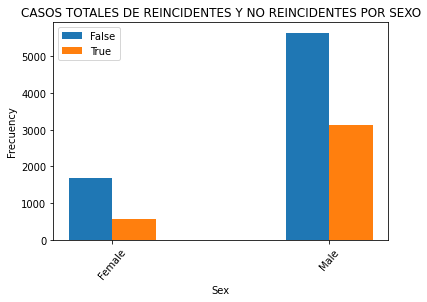

In [69]:
plt.bar(X-0.1, B, width=0.2, label='True')
plt.bar(X+0.1 ,C ,width=0.2, label='False')

plt.xticks(X,['Female', 'Male'],rotation = 50)
           
plt.ylabel('Score mean')
plt.xlabel('Sex')
plt.title('EVALUACIÓN DE RIESGO MEDIA POR SEXO')

plt.legend(loc='best')

plt.show()



plt.bar(X-0.1, h, width=0.2, label='False')
plt.bar(X+0.1 ,g ,width=0.2, label='True')

plt.xticks(X,['Female', 'Male'],rotation = 50)

plt.title('CASOS TOTALES DE REINCIDENTES Y NO REINCIDENTES POR SEXO')
plt.ylabel('Frecuency')
plt.xlabel('Sex')

plt.legend(loc='best')

plt.show()

Analicemos la afirmación del enunciado para los dos sexos. En ella, podemos leer que la evalución de riesgo que da el sistema es mayor para personas de sexo masculino que femenino y, sin embargo, la tasa de reincidencia es mayor para los hombres que las mujeres. Analicemos esta afirmación con estos dos gráficos. 

Para empezar, la evaluación media, tanto para los casos que son verdaderamente reincidentes (true/azul) como para los que no (false/naranja), es similar para ambos grupos de individuos, habiendo unas diferencias de 0.6 y 0.3, respectivamente, para los casos en los que si son verdaderamente reincidentes que para los que no lo son, respectivamente.

En segundo lugar, analicemos los casos que son efectivamente reincidentes en cada grupo. Para el caso de los hombres tenemos que el 35% * de los casos son reincidentes frente a un 25% ** de las mujeres. Por lo que la tasa de reincidencia es un 10% mayor para ellos que para ellas.

En resumen, poniedo ambos datos en porcentaje, obtenemos que los hombres obtiene de media en torno a un 4.5% *** más de riesgo asignado por el sistema, pero a su vez, la reincidencia en delitos es un 10% superior que el otro grupo. Por lo que podemos decir que el 5.5% de diferencia se puede deber a un error y no a una injusta calificación por parte del modelo COMPAS.

*Calculo realizado: 3127 * 100 / 8782

**Calculo realizado: 576 * 100 / 2266

***Media de las diferencias entre hombre y  mujeres para ambos tipos de delitos

### 5. ¿Para qué tipo de riesgos, el de delitos generales o el de delitos violentos, tiene el sistema más capacidad predictiva?

Para responder a esta pregunta vamos a hacer uso de los tablas de contingencia empleadas en el paratado 2. Con ellas calcularemos la exactitud, es decir, el total de casos identificados correctamente por el sistema para los casos de reincidencias no violentas y violentas.

In [70]:
tabla_contingencia

Reales,False,True
Predichos,,
False,6449,1605
True,2200,1503


In [71]:
exactitud = (6449+1503)/(6449+1503+1605+2200)
round(exactitud*100,2)

67.64

Tan solo el 67% de los casos de reincidentes no violentos son identificados correctamente, dejando un error de un tercio de los sujetos que son clasificados incorrectamente

In [72]:
tabla_contingencia2

Reales,False,True
Predichos,,
False,9359,1516
True,616,266


In [73]:
exactitud2 =  (9359+266)/(9359+266+1516+616)
round(exactitud2*100,2)

81.87

Por lo que observamos, la exactitud es mayor para los casos de reincidentes violentos que no violentos. 

Con esto podemos concluir que la capacidad predictiva del sistemas COMPAS es mayor para los casos de reincidentes violentos que para los que no lo son.